# Exploring Data on Prosperous Loans

## Overview of the survey

In this survey, we wanted to understand two things:

* Factors that can be used to predict credit default.


* What factors influence the prosperity rating.

## Dataset Preview

This dataset contains 113937 loans with 81 variables on each loan, for the purpose of this survey we considered the following variables: Term, LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans , LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors.

In [46]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
# Reading data
df_loan = pd.read_csv('prosperLoanData.csv')

## Analysis

In [48]:
# List of output columns for analysis
columns_output =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

# New Dataset with columns to use for analysis
df_output = df_loan[columns_output]

# Removing missing data from ProsperRating column
df_output = df_output.dropna(subset=['ProsperRating (Alpha)']).reset_index()

# Converting the format of the LoanOriginationDate column
df_output['LoanOriginationDate'] = pd.to_datetime(df_output['LoanOriginationDate'])

# Replace missing data in TotalProsperLoans column with zero
df_output['TotalProsperLoans'] = df_output['TotalProsperLoans'].fillna(0)

### Employment status

**Finding 1:**

* The majority of borrowers are employed and all other categories represent a small portion of borrowers.


* In a small group, full time is the highest, after which the freelancers are there and so on.

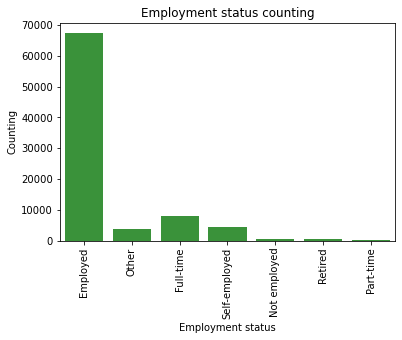

In [49]:
# Displaying the number of observations in each categorical group in the EmploymentStatus column
base_color = sns.color_palette()[2]
sns.countplot(data = df_output, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 90);
plt.ylabel('Counting')
plt.xlabel("Employment status")
plt.title("Employment status counting");

In [50]:
# Data Shape Adjustment
condition = (df_output['LoanStatus'] == 'Completed') | (df_output['LoanStatus'] == 'Defaulted') |\
                  (df_output['LoanStatus'] == 'Chargedoff')
df_output = df_output[condition]

def default_change(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
df_output['LoanStatus'] = df_output.apply(default_change, axis=1)
df_output['LoanStatus'].value_counts()
# Reduction of the number of categories
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
df_output['ListingCategory (numeric)'] = df_output.apply(reduce_categorie, axis=1)

### Prosperity rating and employment status

**Finding 2:**

* The lower coasts seem to have larger proportions of people with the employment status "Not employed", "Self-employed", "Retired" and "Part-time".

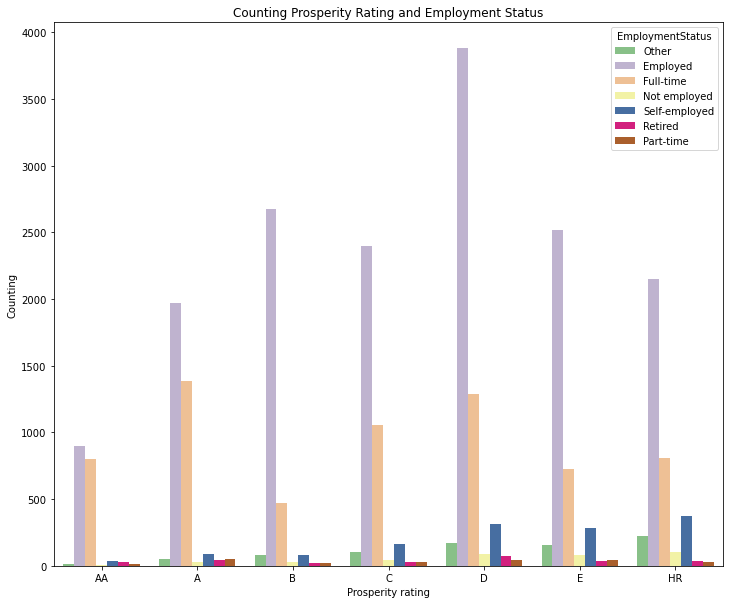

In [51]:
# Display the number of observations in each categorical 
# group of the ProsperRating (Alpha) and EmploymentStatus column
plt.figure(figsize = [12, 10])
sns.countplot(data = df_output, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Accent',
              order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])
plt.ylabel('Counting')
plt.xlabel("Prosperity rating")
plt.title("Counting Prosperity Rating and Employment Status");

### Loan amount and employment status

**Finding 3:**

* From the following graph, we can tell that "employees" tend to take the largest loan amounts

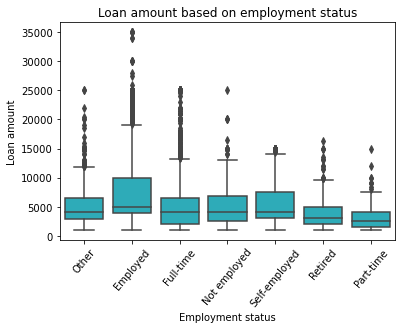

In [52]:
# Box and whisker plot display for the LoanStatus column
base_color = sns.color_palette()[9]
sns.boxplot(data = df_output, x = 'EmploymentStatus', y = 'LoanOriginalAmount', color = base_color);
plt.xlabel("Employment status")
plt.ylabel("Loan amount")
plt.title("Loan amount based on employment status")
plt.xticks(rotation=50);

### Rating, loan amount and loan status

**Finding 4:**

* With the exception of the lowest ratings, defaulted credits tend to be larger than completed credits.


* Most defaulted loans come from people with low prosperity ratings.

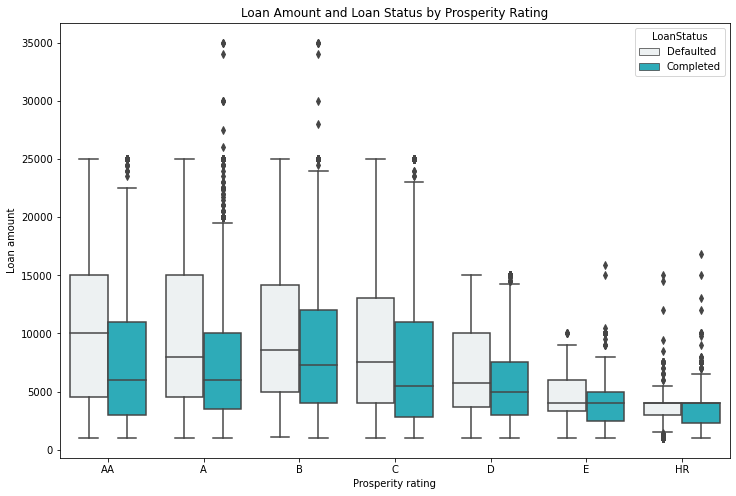

In [53]:
# Box and whisker plot display for the ProsperRating column
base_color = sns.color_palette()[9]
plt.figure(figsize = [12, 8])
sns.boxplot(data=df_output, x='ProsperRating (Alpha)', 
            y='LoanOriginalAmount', hue='LoanStatus', color = base_color,
            order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])
plt.ylabel('Loan amount')
plt.xlabel("Prosperity rating")
plt.title("Loan Amount and Loan Status by Prosperity Rating");

In [54]:
!jupyter nbconvert ProsperLoan_Part2.ipynb --to slides --post serve --no-input --no-prompt


[NbConvertApp] Converting notebook ProsperLoan_Part2.ipynb to slides
[NbConvertApp] Writing 713860 bytes to ProsperLoan_Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/ProsperLoan_Part2.slides.html
Use Control-C to stop this server
